In [84]:
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Постановка проблемы

Предположим, к нам попали данные исследований нескольких (пусть n=3) вакцин;  
В каждом исследовании собирались данные о респондентах, с которых через 1 / 10 / 100 часов собирали оценку самочувствия  

In [6]:
respondents = 1000

def make_research():
  research = {
      "gender": np.random.randint(0,2,respondents),            # 0 - m, 1 - f
      "age": np.random.normal(25.0,20.0,respondents),
      "height": np.random.normal(170.0,15.5,respondents),
      "weight": np.random.normal(65.0,25.0,respondents)
      }

  feeled_bad = 0                                                # считаем, сколько всего людей ощутили себя плохо

  part = np.random.randint(7,20,1)                              # доля респондентов, которые будут подвержены плохому самочувствию
  feeled_bad += part

  research["condition_after_1"] = np.random.normal(
      (5 *                                                      # мат. ожидание сдвигается: если бы исследования и не было, в среднем все ставили бы ровно 5, 
       (respondents * (1 - part/100)) +                         # но теперь 5 в среднем поставят меньшее число людей
       1 * (respondents * part/100))                            # остальные захотят поставить 1.5 
      / respondents,  
                                                                                                                                                                    
      2.0, 
      respondents
      )

  got_better = 1 if np.random.randint(0,10,1) > 7 else -1       # будем считать, что люди более склонны иметь ухудшившееся самочувствие через какое-то время
  part = np.random.randint(
      7 - (got_better * 2),
      20 - (got_better * 5),
      1) 
  feeled_bad += part

  research["condition_after_10"] = np.random.normal(
      (5 *                                        
       (respondents * (1 - part/100)) +           
       1 * (respondents * part/100))             
      / respondents,  
                                                                                                                                                                    
      1.0, 
      respondents
      )

  got_better = 1 if np.random.randint(0,10,1) > 3 else -1       # будем считать, что люди более склонны иметь улучшившееся самочувствие через продолжительное время
  part = np.random.randint(
      7 - (got_better * 3),
      20 - (got_better * 7),
      1)
  feeled_bad += part

  research["condition_after_100"] = np.random.normal(
      (5 *                                        
       (respondents * (1 - part/100)) +           
       1 * (respondents * part/100))            
      / respondents,  
                                                                                                                                                                    
      2.5, 
      respondents
      )
  
  return research

In [73]:
researh_0 = make_research()

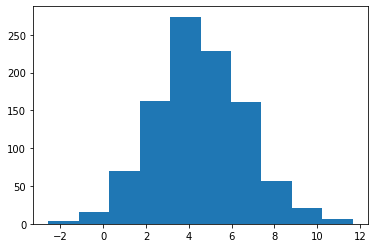

In [11]:
_ =plt.hist(researh_0["condition_after_1"])

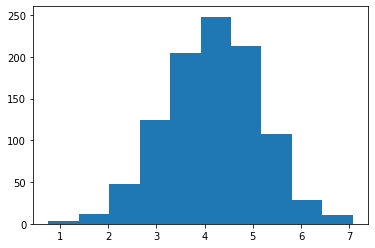

In [12]:
_ =plt.hist(researh_0["condition_after_10"])

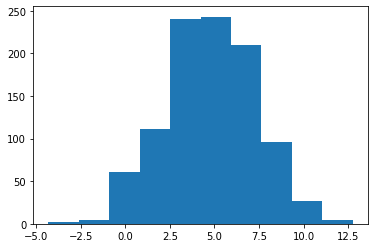

In [13]:
_ =plt.hist(researh_0["condition_after_100"])

# Задание

Мы хотим:
- проверить, что с данными все в порядке (т.к. данные генерили с помощью распределений, у нас могут быть отрицательные числа, которые надо исправить на 0, а также числа больше 10, которые надо исправить на 10)
- сравнить между собой результаты исследований разных вакцин
- каким-либо образом представить сравнение исследований (т.е., к примеру, показать в одном пространстве сразу 3 исследования, пользуясь признаками "средняя оценка самочувствия после 1 часа", "средняя оценка самочувствия после 10 часов", "средняя оценка самочувствия после 100 часов"

Чистим возраст

In [222]:
age = researh_0["age"].tolist()
print(age)

for i in range(len(age)):
    age [i] = abs(round(age[i]))
    if age[i] == 0:
       age[i] = 1
print(age)

back_to_array = np.array(age)

researh_0["age"] = back_to_array


[29, 21, 1, 9, 25, 51, 13, 12, 37, 1, 38, 3, 49, 29, 27, 33, 22, 45, 32, 10, 51, 28, 3, 19, 17, 7, 14, 45, 21, 45, 6, 26, 53, 51, 16, 1, 24, 18, 28, 17, 33, 36, 19, 26, 21, 36, 10, 30, 17, 8, 11, 31, 36, 3, 40, 46, 37, 31, 16, 42, 37, 14, 13, 7, 25, 4, 27, 18, 42, 40, 18, 19, 33, 46, 34, 43, 36, 8, 11, 47, 45, 30, 21, 1, 42, 7, 19, 33, 2, 3, 24, 42, 25, 9, 35, 34, 9, 1, 2, 15, 13, 26, 25, 3, 36, 19, 28, 46, 47, 1, 18, 31, 15, 9, 14, 11, 27, 10, 44, 9, 26, 55, 13, 8, 29, 13, 39, 11, 4, 7, 15, 31, 61, 36, 10, 22, 16, 24, 19, 37, 17, 7, 35, 29, 44, 29, 19, 9, 21, 54, 22, 31, 20, 45, 36, 1, 12, 52, 9, 54, 26, 16, 24, 3, 20, 23, 45, 38, 32, 17, 22, 20, 20, 51, 1, 16, 16, 5, 31, 24, 16, 36, 31, 25, 39, 42, 47, 10, 63, 2, 7, 51, 12, 52, 29, 40, 43, 110, 17, 7, 2, 21, 8, 21, 41, 50, 52, 18, 14, 12, 17, 9, 9, 6, 6, 15, 9, 37, 29, 5, 59, 46, 26, 44, 19, 36, 35, 27, 30, 14, 45, 56, 23, 11, 47, 10, 41, 24, 13, 41, 46, 33, 31, 33, 39, 57, 6, 62, 72, 8, 20, 11, 5, 7, 36, 46, 27, 34, 44, 41, 21, 4, 1

Готово! Чистим НЕ возраст

In [223]:
def cleaner(x):
    if x < 0:
      x = 0
    elif x > 10:
      x = 10
    return x

In [ ]:
cond1 = researh_0["condition_after_1"].tolist()

for i in range(len(cond1)):
    if cond1[i] < 1:
        cond1[i] = 0
    elif cond1[i] > 10:
        cond1[i] = 10

back_to_array = np.array(cond1)

researh_0["condition_after_1"] = back_to_array

print(researh_0)

Кажется, с первым исследованием порядок. Числа на своих местах, всё с ними хорошо. Создадим ещё два набора данных

In [225]:
researh_1 = make_research()

age1 = researh_1["age"].tolist()

for i in range(len(age)):
    age1 [i] = abs(round(age[i]))
    if age1[i] == 0:
       age1[i] = 1


back_to_array = np.array(age1)

researh_1["age"] = back_to_array

cond1 = researh_1["condition_after_1"].tolist()

for i in range(len(cond1)):
    if cond1[i] < 1:
        cond1[i] = 0
    elif cond1[i] > 10:
        cond1[i] = 10

back_to_array = np.array(cond1)

researh_1["condition_after_1"] = back_to_array

cond10 = researh_1["condition_after_10"].tolist()

for i in range(len(cond10)):
    if cond10[i] < 1:
        cond10[i] = 0
    elif cond10[i] > 10:
        cond10[i] = 10

back_to_array = np.array(cond10)

researh_1["condition_after_10"] = back_to_array

cond100 = researh_1["condition_after_100"].tolist()

for i in range(len(cond100)):
    if cond100[i] < 1:
        cond100[i] = 0
    elif cond100[i] > 10:
        cond100[i] = 10

back_to_array = np.array(cond100)

researh_1["condition_after_100"] = back_to_array




In [226]:
researh_2 = make_research()

age1 = researh_2["age"].tolist()

for i in range(len(age)):
    age1 [i] = abs(round(age[i]))
    if age1[i] == 0:
       age1[i] = 1


back_to_array = np.array(age1)

researh_2["age"] = back_to_array

cond1 = researh_2["condition_after_1"].tolist()

for i in range(len(cond1)):
    if cond1[i] < 1:
        cond1[i] = 0
    elif cond1[i] > 10:
        cond1[i] = 10

back_to_array = np.array(cond1)

researh_2["condition_after_1"] = back_to_array

cond10 = researh_2["condition_after_10"].tolist()

for i in range(len(cond10)):
    if cond10[i] < 1:
        cond10[i] = 0
    elif cond10[i] > 10:
        cond10[i] = 10

back_to_array = np.array(cond10)

researh_2["condition_after_10"] = back_to_array

cond100 = researh_2["condition_after_100"].tolist()

for i in range(len(cond100)):
    if cond100[i] < 1:
        cond100[i] = 0
    elif cond100[i] > 10:
        cond100[i] = 10

back_to_array = np.array(cond100)

researh_2["condition_after_100"] = back_to_array


In [227]:
print("Первая вакцина. Состояние через 1 день:", statistics.mean(researh_0["condition_after_1"])," Через 10 дней: ", 
      statistics.mean(researh_0["condition_after_10"])," Через 100 дней: ", statistics.mean(researh_0["condition_after_100"]))

print("Вторая вакцина. Состояние через 1 день:", statistics.mean(researh_1["condition_after_1"])," Через 10 дней: ", 
      statistics.mean(researh_1["condition_after_10"])," Через 100 дней: ", statistics.mean(researh_1["condition_after_100"]))
print("Третья вакцина. Состояние через 1 день:", statistics.mean(researh_2["condition_after_1"])," Через 10 дней: ", 
      statistics.mean(researh_2["condition_after_10"])," Через 100 дней: ", statistics.mean(researh_2["condition_after_100"]))



Первая вакцина. Состояние через 1 день: 4.637222923585003  Через 10 дней:  4.546546761792916  Через 100 дней:  4.081301828580544
Вторая вакцина. Состояние через 1 день: 4.525926784813446  Через 10 дней:  4.805617226780222  Через 100 дней:  4.679753135467005
Третья вакцина. Состояние через 1 день: 4.398387913642333  Через 10 дней:  4.693906802331876  Через 100 дней:  4.728662779627138


Как мы видим, лучше всего больные чувствуют себя спустя 100 дней после вакцинации вакциной №3. Хуже всего — через 100 дней после вакцинации первой. В среднем, вакцина №2 показывает неплохой результат, она эффективнее всего через 10 дней. Но на долгой дистанции (100 дней) лучше всего работает вакцина №3.

Теперь посмотрим, как это отразится на графиках

In [228]:
mean1 = [statistics.mean(researh_0["condition_after_1"]), statistics.mean(researh_0["condition_after_10"]), statistics.mean(researh_0["condition_after_100"])]

mean2 = [statistics.mean(researh_1["condition_after_1"]), statistics.mean(researh_1["condition_after_10"]), statistics.mean(researh_1["condition_after_100"])]

mean3 = [statistics.mean(researh_2["condition_after_1"]), statistics.mean(researh_2["condition_after_10"]), statistics.mean(researh_2["condition_after_100"])]


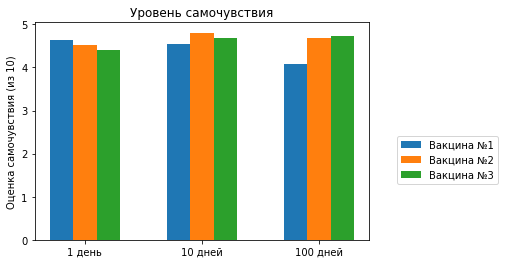

In [251]:
labels = ["1 день", "10 дней", "100 дней"]

x = np.arange(len(labels)) 
width = 0.2 

fig, ax = plt.subplots()
rects1 = ax.bar(x, mean1, width, label="Вакцина №1")
rects2 = ax.bar(x + width, mean2, width, label="Вакцина №2")
rects3 = ax.bar(x + 2*width, mean3, width, label="Вакцина №3")


ax.set_ylabel("Оценка самочувствия (из 10)")
ax.set_title("Уровень самочувствия")
ax.set_xticks(x + width)
ax.set_xticklabels(("1 день", "10 дней", "100 дней"))
ax.legend(loc='best', bbox_to_anchor=(0.9, 0., 0.5, 0.5))





plt.show()